 ## Classification for the survival based on Titanic Dataset

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Sex'>

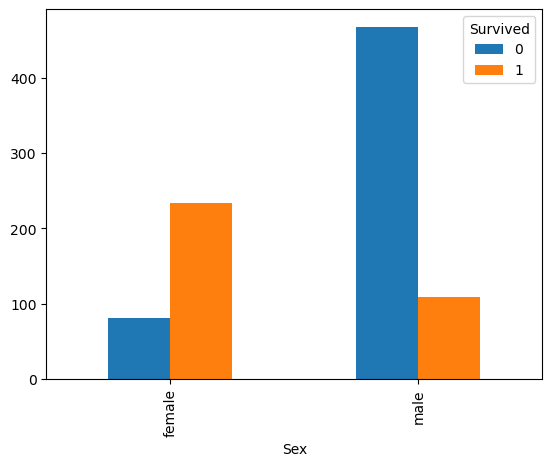

In [5]:
pd.crosstab(train_data["Sex"], train_data["Survived"]).plot(kind="bar")

In [6]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [7]:
# It is evident from the above bar chart that more females survived than males. 
# We find percentage of survival of each genders.
female_survived = 0
male_survived = 0
for i in range(0, len(train_data)):
    if train_data["Sex"][i] == "female":
        if train_data["Survived"][i] == 1:
            female_survived += 1
    else:
        if train_data["Survived"][i] == 1:    
            male_survived += 1
tot_males, tot_females = 577, 314
Per_Survived_male = male_survived/tot_males
Per_Survived_female = female_survived/tot_females
Per_Survived_male, Per_Survived_female

(0.18890814558058924, 0.7420382165605095)

<AxesSubplot:xlabel='Survived'>

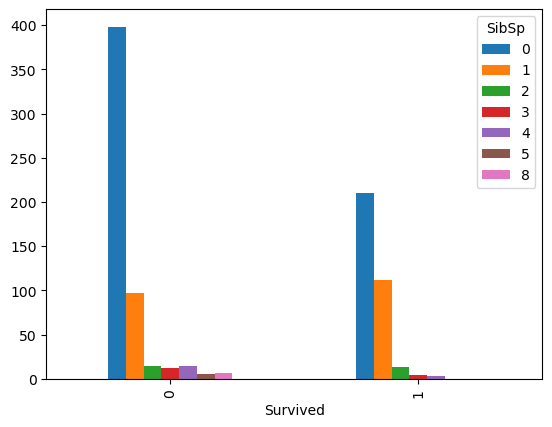

In [8]:
pd.crosstab(train_data["Survived"], train_data["SibSp"]).plot(kind="bar")

<AxesSubplot:xlabel='Survived'>

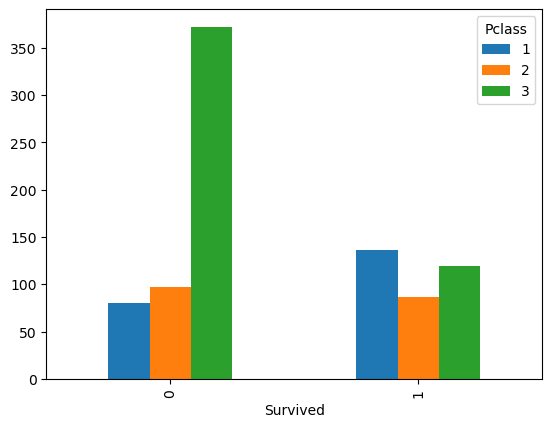

In [9]:
pd.crosstab(train_data["Survived"], train_data["Pclass"]).plot(kind="bar")

In [10]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
train_data["Cabin"]

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [12]:
# This function cleans the data and gets it ready for modelling process
def preprocess(df):
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label] = content.fillna(content.median())
    
    df = df.drop("Cabin", axis=1)
    
    enc = LabelEncoder()
    df["Sex"] = enc.fit_transform(df["Sex"])
    df["Embarked"] = enc.fit_transform(df["Embarked"])
    
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[label] = pd.Categorical(content).codes+1
    
    return df

In [13]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
final_train = preprocess(train_data)
final_test = preprocess(test_data)

In [15]:
final_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,109,1,22.0,1,0,524,7.2500,2
1,2,1,1,191,0,38.0,1,0,597,71.2833,0
2,3,1,3,354,0,26.0,0,0,670,7.9250,2
3,4,1,1,273,0,35.0,1,0,50,53.1000,2
4,5,0,3,16,1,35.0,0,0,473,8.0500,2


In [16]:
final_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,207,1,34.5,0,0,153,7.8292,1
1,893,3,404,0,47.0,1,0,222,7.0000,2
2,894,2,270,1,62.0,0,0,74,9.6875,1
3,895,3,409,1,27.0,0,0,148,8.6625,2
4,896,3,179,0,22.0,1,1,139,12.2875,2


## Modelling

In [17]:
# We split training data into validation set.
X = final_train.drop("Survived", axis=1)
y = final_train["Survived"]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1)
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
20,21,2,274,1,35.0,0,0,140,26.0000,2
362,363,3,65,0,45.0,0,1,212,14.4542,0
117,118,2,827,1,29.0,1,0,54,21.0000,2
136,137,1,586,0,19.0,0,2,56,26.2833,2
488,489,3,775,1,30.0,0,0,518,8.0500,2


In [18]:
from sklearn.naive_bayes import GaussianNB
models = {"Random Forest Classifier": RandomForestClassifier(),
          " Logistic Regression": LogisticRegression(),
           " KNN Classifier": KNeighborsClassifier(),
          " Naive Bayes Model ": GaussianNB()}

def modelling(models, X_train, y_train, X_valid, y_valid):
    np.random.seed(40)
    
    accuracies = {}
    
    for name, model in models.items():
        #np.random.seed(40)
        model.fit(X_train, y_train)
        
        accuracies[name] = model.score(X_valid, y_valid)
    
    return accuracies

In [19]:
modelling(models=models, X_train=X_train, y_train=y_train, X_valid=X_valid, y_valid=y_valid)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid t

{'Random Forest Classifier': 0.8333333333333334,
 ' Logistic Regression': 0.7777777777777778,
 ' KNN Classifier': 0.6111111111111112,
 ' Naive Bayes Model ': 0.7333333333333333}

In [20]:
# We choose Random Forest Classifier and Logistic Regression to optimize the parameters
np.random.seed(42)
parameters_Random = {"n_estimators": np.arange(10, 300, 20),
                     "max_depth": [None, 2, 4, 6, 7],
                     "min_samples_split": np.arange(2, 20, 2),
                     "min_samples_leaf": np.arange(2, 20, 2)
             }

parameters_Log = {"C": np.arange(2, 20, 2),
                  "solver": ["liblinear"]
    
}

Random = RandomizedSearchCV(RandomForestClassifier(), param_distributions=parameters_Random, cv=5)


In [21]:
model1 = RandomForestClassifier()
np.random.seed(40)
model1.fit(X_train, y_train)
model1.score(X_valid, y_valid)

0.8333333333333334

In [23]:

Random_grid = GridSearchCV(RandomForestClassifier(), param_grid=parameters_Random, cv=5, error_score='raise')
Random_grid.fit(X_train, y_train)
Random_grid.score(X_valid, y_valid)


0.8222222222222222

In [24]:
Random_grid.best_params_

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 16,
 'n_estimators': 50}

In [25]:
Logistic = RandomizedSearchCV(LogisticRegression(), param_distributions=parameters_Log, cv=5)
Logistic.fit(X_train, y_train)
Logistic.score(X_valid, y_valid)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.7666666666666667

In [32]:
# We consider best parameters from RandomForest Classifier
np.random.seed(42)
ideal_model = RandomForestClassifier(n_estimators=50, min_samples_split=16, min_samples_leaf=2, max_depth=None)
ideal_model.fit(X_train, y_train)
ideal_model.score(X_valid, y_valid)

0.8222222222222222

In [33]:
Mod_pred = ideal_model.predict(final_test)

In [34]:
Mod_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [35]:
preds = pd.DataFrame()
preds["PassengerId"] = final_test["PassengerId"]
preds["Survived"] = Mod_pred
preds.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [36]:
preds.to_csv("gender_submission.csv", index=False)